# Evaluating TF-IDF

In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import pickle
import json

    
os.chdir("C:\\Users\\SJNic\\Documents\\University\\Master\\Thesis\\Thesis Code")

# Read the new files
with open("NewProcessingData/documentsInformation.txt", "rb") as fp:   
    documentsInformation = pickle.load(fp)
# the file containing the ground truth
with open("Besluithistorie/historieDocs.txt", "rb") as fp:
    historieDocs = pickle.load(fp)
    
TF_IDF = pd.read_pickle("Similarities/new_TF_IDF.pkl")
TF_IDF

doc,0000a2fd-0427-4949-a3b4-e39f4635f421,0005b23b-f2be-4b55-9f83-dcf966cb3b29,00068e84-19ef-4db9-8d2a-7e51ff69e18c,00096dc9-44fd-4ba2-aa89-6ece5f79a44b,00097ca8-b918-4dd3-99bf-9728d1fd5ee4,000aaa77-d806-43ab-ba59-b6965976c938,000b07d1-7d14-404e-89ee-2c36e5cef79e,000c3f3c-4117-42e3-ba3e-45a5ccf028aa,000c8e85-0820-4ab9-824c-057c8ad16e2d,000cb1da-1b7f-4a10-af75-9d9fbf7a079c,...,ffe948a6-5555-49c2-9f50-cfbac5db72c7,ffeb6932-2100-4147-a671-10f931b06a96,fff4ff8d-8c8e-4b9c-9294-545de0380190,fff58779-69c5-4aa3-9e15-41733423e3c3,fff60bef-9e93-47e3-9f11-8bd0941d084c,fff65d87-1368-42a0-85a0-028a36b66820,fff9faf4-7f86-43af-a065-d803b85e1268,fffe5196-feb7-4be1-8ef7-cc55a79e16ac,ffff3a5f-58f5-466f-9910-3f2866c00ee4,ffff887f-cbdc-4930-adc4-d16c061a71db
doc,,,,,,,,,,,,,,,,,,,,,
0000a2fd-0427-4949-a3b4-e39f4635f421,1.000000,0.0,0.027947,0.021431,0.000000,0.020819,0.012433,0.038852,0.022212,0.034619,...,0.011096,0.009566,0.015779,0.023230,0.009169,0.031136,0.015508,0.0,0.024079,0.0
0005b23b-f2be-4b55-9f83-dcf966cb3b29,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
00068e84-19ef-4db9-8d2a-7e51ff69e18c,0.027947,0.0,1.000000,0.052331,0.000000,0.058001,0.051845,0.055653,0.085751,0.073484,...,0.066765,0.037065,0.063272,0.039510,0.049186,0.110870,0.050131,0.0,0.039007,0.0
00096dc9-44fd-4ba2-aa89-6ece5f79a44b,0.021431,0.0,0.052331,1.000000,0.000000,0.027694,0.030255,0.040413,0.058237,0.068567,...,0.011230,0.030125,0.035841,0.080502,0.042945,0.072257,0.041729,0.0,0.011343,0.0
00097ca8-b918-4dd3-99bf-9728d1fd5ee4,0.000000,0.0,0.000000,0.000000,1.000000,0.019302,0.001249,0.000301,0.007609,0.002490,...,0.000000,0.004733,0.018857,0.002934,0.011548,0.013146,0.000000,0.0,0.000799,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff65d87-1368-42a0-85a0-028a36b66820,0.031136,0.0,0.110870,0.072257,0.013146,0.070529,0.141738,0.062662,0.233907,0.181387,...,0.036269,0.098647,0.115927,0.097071,0.111619,1.000000,0.090181,0.0,0.049513,0.0
fff9faf4-7f86-43af-a065-d803b85e1268,0.015508,0.0,0.050131,0.041729,0.000000,0.039424,0.033188,0.090925,0.059631,0.128745,...,0.046848,0.036824,0.057206,0.049084,0.024466,0.090181,1.000000,0.0,0.053797,0.0
fffe5196-feb7-4be1-8ef7-cc55a79e16ac,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [101]:
with open("Besluithistorie/Thomas/historieProposalDocs.txt", "rb") as fp:
    historieProposalDocs = pickle.load(fp)

In [102]:
# initiatiefvoorstel verbod afsteken consumenten vuurwerk toevoegen
historieProposalDocs["898ad2c2-058c-496f-90e6-8e5710e1ed7a"] = {"itemTitle": "Initiatiefvoorstel verbod afsteken consumentenvuurwerk",
                                                               "itemID": "898ad2c2-058c-496f-90e6-8e5710e1ed7a",
                                                               "docs": [documentsInformation["e441f0bc-ec02-4c1b-8932-039a89d22235"]["unique id"],
                                                                       documentsInformation["b22b9519-608b-4c9c-9240-2865cd421d6c"]["unique id"],
                                                                       documentsInformation["b157f358-5664-447d-b009-5f3f53b367e3"]["unique id"],
                                                                       documentsInformation["0d0dda63-acd1-46ff-b7b9-d9e6e272226c"]["unique id"],
                                                                       documentsInformation["cc2a839b-4d78-4421-9f9b-f4cf83f752b4"]["unique id"]
                                                                       ]}

In [106]:
chosenKeys = ["e638d5f8-f0e8-44b0-9168-bde292150c73", #0
              "a422f486-9b68-40f9-ab84-af7c1fde9017",#1
              "4055759c-8f5a-46fa-829a-6127b09e3d5a",#2
              "29834557-37a8-46e3-ad9e-cf06d79a478a",#3
              "46b9aabe-3958-4b6f-833e-051c9aefcc6a",#4
              "20dbf3a0-f651-4259-975a-3bc8013604b5",#5
              "c3c160ca-3942-46da-8b28-564dab94f9fc",#6
              "898ad2c2-058c-496f-90e6-8e5710e1ed7a",#7 moet nog
              "6328dc36-607d-4c00-a35c-9d6cc548a07e",# 8
              "009fd1d9-dc31-4086-8132-18c568b0db61"]# 9

In [108]:
finding_docs_failures = 0 # only 56 documents could not be found


for key in [chosenKeys[2]]:
    historieInfo = historieProposalDocs[key]
    #print(historieInfo)
    
    # create a df which can be used for sorting
    sorting_df = pd.DataFrame(columns=["doc name", "Relevance", "url"])
    sorting_df["url"] = ""
    
    # loop through all docs attached to this proposal with the decision history
    for docID in historieInfo["docs"]:
        print(documentsInformation[docID]["displayname"])
        
        # sometimes finding a doc fails, so in that case skip it
        try: 
            related_docs = return_related_docs(TF_IDF, docID, 0.3, False, 2)
        except:
            finding_docs_failures+=1
        
        # loop through all the documents that are found to be relevant
        for i in range(len(related_docs[0])):
            doc = related_docs[0][i]
            score = related_docs[1][i]
            
            # if it is an already known document then skip it
            if doc in docID:
                continue
                
            if "dossier" in documentsInformation[doc]["displayname"].lower() or "link naar ro" in documentsInformation[doc]["displayname"].lower() or "niet-toepasselijkheid" in documentsInformation[doc]["displayname"].lower():
                continue
            
            # if this doc not yet in the df then add it
            if doc not in sorting_df.index:
                sorting_df.loc[doc] = [documentsInformation[doc]["displayname"], score, documentsInformation[doc]["publicdownloadurl"]]
            
            # oterwise see if the score should be update
            else:
                if score > sorting_df.loc[doc]["Relevance"]:
                    sorting_df.loc[doc, "Relevance"] = score
    
    break
pd.set_option('display.max_colwidth', None)
sorting_df.sort_values("Relevance", ascending = False).head(50)

Dossier 680 voorblad.pdf
Voorstel_11853.pdf
Verordening tot wijziging van de APV Utrecht 2010.pdf
Toelichting APV artikel 2.pdf
Was-wordt-lijst bij wijzigingsverordening APV tegengaan onveilig.pdf
Besluitenhistorie bij wijzigingsvoorstel APV tegengaan onveilig.pdf


,doc name,Relevance,url
5773ff05-2438-4539-b9b4-aa8ea23d7112,Toelichting APV artikel 2.pdf,1.000000,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=5773ff05-2438-4539-b9b4-aa8ea23d7112
b5b17171-96d4-486b-af36-1b5fae6a1967,VERVALLEN Was-wordt-lijst bij wijzigingsverordening APV tegengaan onveilig niet leefbaar en malafide ondernemersklimaat,1.000000,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=b5b17171-96d4-486b-af36-1b5fae6a1967
69a2fdad-0dcb-408e-8909-bcf94413d87e,Voorstel_11853,1.000000,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=69a2fdad-0dcb-408e-8909-bcf94413d87e
1c0381ab-4939-4a52-98fd-558198f916ae,Besluitenhistorie bij wijzigingsvoorstel APV tegengaan onveilig niet leefbaar en malafide ondernemersklimaat.pdf,1.000000,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=1c0381ab-4939-4a52-98fd-558198f916ae
efeed754-689c-4783-acad-494e9f7b93f7,STREKT TER VERVANGING Besluitenhistorie bij voorstel tot wijziging APV_ partiële herziening .pdf,1.000000,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=efeed754-689c-4783-acad-494e9f7b93f7
8120aa21-06bc-4668-a452-8520f3880410,"VERVALLEN Verordening tot wijziging van de APV Utrecht 2010, tegengaan onveilig, niet leefbaar en malafide ondernemersklimaat",1.000000,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=8120aa21-06bc-4668-a452-8520f3880410
72db785f-1c44-461e-bde6-006662cdde8c,"Verordening tot wijziging van de APV Utrecht 2010, tegengaan onveilig, niet leefbaar en malafide ondernemersklimaat (februari 2020)",1.000000,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=72db785f-1c44-461e-bde6-006662cdde8c
0b92c08d-bc98-4f49-b547-a09f7070e142,Voorstel_11853.pdf,0.998542,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=0b92c08d-bc98-4f49-b547-a09f7070e142
146fba6b-e836-48ed-a8c6-d817981979a3,Getekend raadsbesluit wijziging APV (06032020).pdf,0.994127,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=146fba6b-e836-48ed-a8c6-d817981979a3
7062daba-17e1-467b-8cad-5a174f598dac,Wijziging Verordening APV Ondermijning - DROP(na verwerking amendement).docx,0.987421,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=7062daba-17e1-467b-8cad-5a174f598dac


In [33]:
doc = "0b0e9641-e7f8-4bf9-8a61-a1f36a03d95d"
sorting_df.loc[doc]["Relevance"]

0.4392092573118016

# Comparing to the besluithistorie

In [2]:
# function for returning the most relevant documents based on the given key
def return_related_docs(df, id, min_value, print_bool = False, max_docs_to_print = 2):
        
    Related_docs = df.loc[id][df.loc[id] > min_value].sort_values(ascending = False).index
    
    Related_docs2 = []#Related_docs#[]
    
    for doc in Related_docs:
        if doc != id:
            Related_docs2.append(doc)
    
    if print_bool:
        print("The doc given to this function:\n")    
        [print(x, documentsInformation[id][x]) for x in documentsInformation[id]]

        print("\nRelated documents:")
        
        [print(f"{documentsInformation[x]['displayname']}") for x in Related_docs[:max_docs_to_print]]
    
    return (Related_docs2, df.loc[id][df.loc[id] > min_value].sort_values(ascending = False).values)

## Relevance assessment with besluithistories

In [99]:
import random
#key = random.choice(list(historieDocs.keys()))
key =list(historieDocs.keys())[0]
key = documentsInformation[key]["unique id"]
print(documentsInformation[key])
key

{'document id': '8369220c-93f4-4580-a914-631e81063818', 'displayname': 'Besluitenhistorie participatie 25 juni 2019', 'filename': 'Besluitenhistorie participatie 25 juni 2019.pdf', 'filesize': '72508', 'publicdownloadurl': 'https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=8369220c-93f4-4580-a914-631e81063818', 'unique id': '8369220c-93f4-4580-a914-631e81063818'}


'8369220c-93f4-4580-a914-631e81063818'

In [100]:
related_docs = return_related_docs(TF_IDF, key, 0.0, False) 

test = {}

for i in range(0,15):
    
    doc = related_docs[0][i]
    docInfo = documentsInformation[doc]
    #print(f"{i} Document name: \t{docInfo['displayname']}")
    #print(f"{i} Download url: \t{docInfo['publicdownloadurl']}")
    
    test[i+1] = [docInfo['displayname'], related_docs[1][i], docInfo['publicdownloadurl']]

pd.set_option('display.max_colwidth', -1)
test = pd.DataFrame.from_dict(test).T
test

<ipython-input-100-e52106f8e9e7>:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,0,1,2
1,Raadsbrief vernieuwing van wijkparticipatie..docx,1.0,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=dbbc2c82-24fa-4d51-8caa-5c13468c6d70
2,Raadsbrief Terugkoppeling Al doende vernieuwen van de wijkparticipatie.docx,0.637339,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=ccf86a21-755c-402a-99f5-62a687dbf043
3,Uitnodiging raad vernieuwing wijkparticipatie,0.581775,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=0df6daf8-b9fc-4137-8cb1-60215f5eb3a2
4,"M155 Budgetrecht, als onderdeel vernieuwing wijkparticipatie",0.476317,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=25ff4600-794e-4781-87b9-5633f1038e2f
5,Bijlage 1 Bronvermelding.pdf,0.361648,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=cf80e018-4784-47e6-a557-197b2f8c2cd7
6,Motie 155 ciebrief MS 20160420,0.296028,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=72497186-bcce-4b1d-8565-c2eec8b9fbe4
7,Raadsmemo Toezegging 1515 online participatie.docx,0.288256,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=f4e2f461-8743-4c85-a2fe-340a529cf926
8,Voorstel_11755,0.2668,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=b9030f32-57aa-4ae4-a4d8-3b8518ce9182
9,Voorstel_11755.pdf,0.25715,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=497a1cd2-92fb-4ad6-a3f6-ec632c3f6a32
10,Raadsbrief Vernieuwen wijkparticipatie,0.25715,https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=526b4dab-78a8-4f91-98f1-c20c4c67cf93


In [6]:
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
def CalculateScores(histories, df, threshold, printing = False, example = False):
    # total True positives, False positives, True negatives, False negatives
    total_TP = []
    total_FP = []
    total_TN = []
    total_FN = []
    
    missed_docs = 0
    
    # loop through every historie in the histories
    for key in histories:
        # scores for this run#document_item_match.to_csv("Duplicate Detection/document_item_match.csv", index=False)
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        
        # get the documents belonging to this historie + the key to the historie itself
        histDocIDs =  histories[key]
        
        # get the unique version of this besluithistorie doc
        key = documentsInformation[key]["unique id"]
        #histDocIDs  = histDocIDs + [key]
        
        #print(histDocIDs)
        if example:
            print("Historie documents")
            for histDocID in histDocIDs:
                print(histDocID, documentsInformation[histDocID]["displayname"])
        
        # sometimes the documents cannot be found
        try:
            # get the docs related to this historie according to the given df
            resultsDocIDs = return_related_docs(TF_IDF, key, threshold, False) 
            
            if example:
                print("\n\nRelated documents:")
                for resultDocID in resultsDocIDs:
                    print(resultDocID, documentsInformation[resultDocID]["displayname"])
            
        except:
            missed_docs+=1
            continue
        
        # the same list of docs as the historie, but we use this one to calculate the false negatives
        docs_matched = 0
        
        if example:
            print("\nMatches")
        # loop through the docIDs to calculate the scores
        for resultDocID in resultsDocIDs:
            
            # True positive
            if resultDocID in histDocIDs:
                TP += 1
                docs_matched +=1
                
                if example:
                    print("Matching doc: ",documentsInformation[resultDocID]["displayname"])
            # false positives
            else :
                FP += 1
        
        # The false negatives are equal to the number of documents we have not found
        FN += len(histDocIDs) - docs_matched
        
        # True negatives is equal to every document not found by the method which should also not be found
        TN += len(documentsInformation) - TP - FP - FN
        
        # add the new values
        total_TP.append(TP)
        total_FP.append(FP)
        total_TN.append(TN)
        total_FN.append(FN)
        
        if example:
            break
    
    precision = np.sum(total_TP) / (np.sum(total_TP) + np.sum(total_FP))
    recall = np.sum(total_TP) / (np.sum(total_TP) + np.sum(total_FN))
    
    if printing:
        print("_________________________________________________________________________________")
        print("Score\t\t\tTotal\t\tMean")
        print(f"True positives:\t\t{np.sum(total_TP)}\t\t{np.mean(total_TP)}")
        print(f"False positives:\t{np.sum(total_FP)}\t\t{np.mean(total_FP)}")
        print(f"True negatives:\t\t{np.sum(total_TN)}\t\t{np.mean(total_TN)}")
        print(f"False negatives:\t{np.sum(total_FN)}\t\t{np.mean(total_FN)}")
        print("")
        
        print(f"Precision:\t\t{precision}")
        print(f"Recall:\t\t\t{recall}")
    
    return (precision, recall, (total_TP, total_FP, total_TN, total_FN))
    #return (total_TP, total_FP, total_TN, total_FN)
scores = CalculateScores(historieDocs, TF_IDF, 0.25, True, False)

_________________________________________________________________________________
Score			Total		Mean
True positives:		0		0.0
False positives:	114		2.0
True negatives:		2971391		52129.666666666664
False negatives:	304		5.333333333333333

Precision:		0.0
Recall:			0.0


# sensitivty analysis

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# sensitivity analysis
precision_scores = []
recall_scores = []
other_scores = []

steps = 200

for i in tqdm(range(steps)):
    scores = CalculateScores(historieDocs, TF_IDF, i / steps)
    precision_scores.append(scores[0])
    recall_scores.append(scores[1])
    other_scores.append(scores[2])


100%|██████████| 200/200 [00:23<00:00,  8.40it/s]


# save the scores
with open("Evaluation/tf-idfPrecision.txt", "wb") as fp:
    pickle.dump(precision_scores, fp)
with open("Evaluation/tf-idfRecall.txt", "wb") as fp:
    pickle.dump(recall_scores, fp)

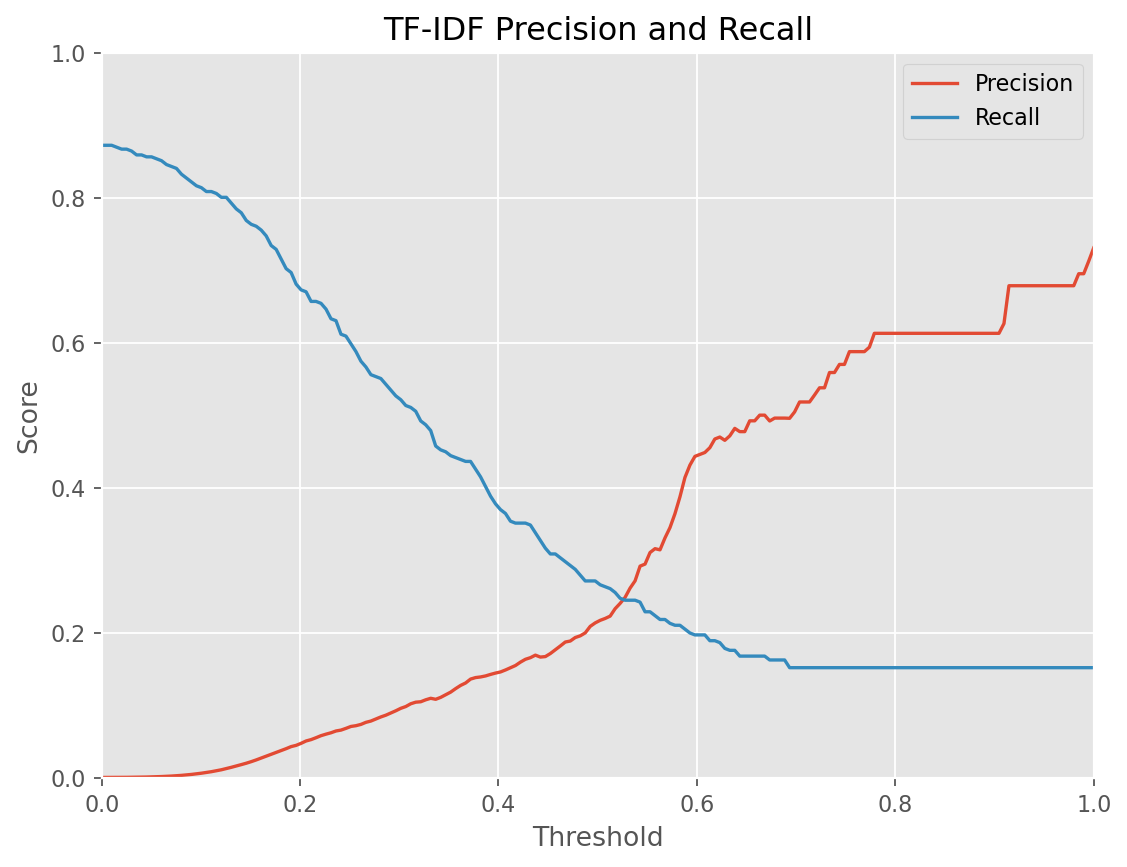

In [8]:
from matplotlib.pyplot import figure

#plt.style.use('seaborn-whitegrid')
plt.style.use('ggplot')
#plt.style.use('science')

figure(figsize=(8, 6), dpi=160)

x = np.linspace(0, 1, steps)
plt.plot(x, precision_scores, label = "Precision")
plt.plot(x, recall_scores, label = "Recall")

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("TF-IDF Precision and Recall")

plt.legend()

#plt.savefig("Evaluation/TF-IDF.png")

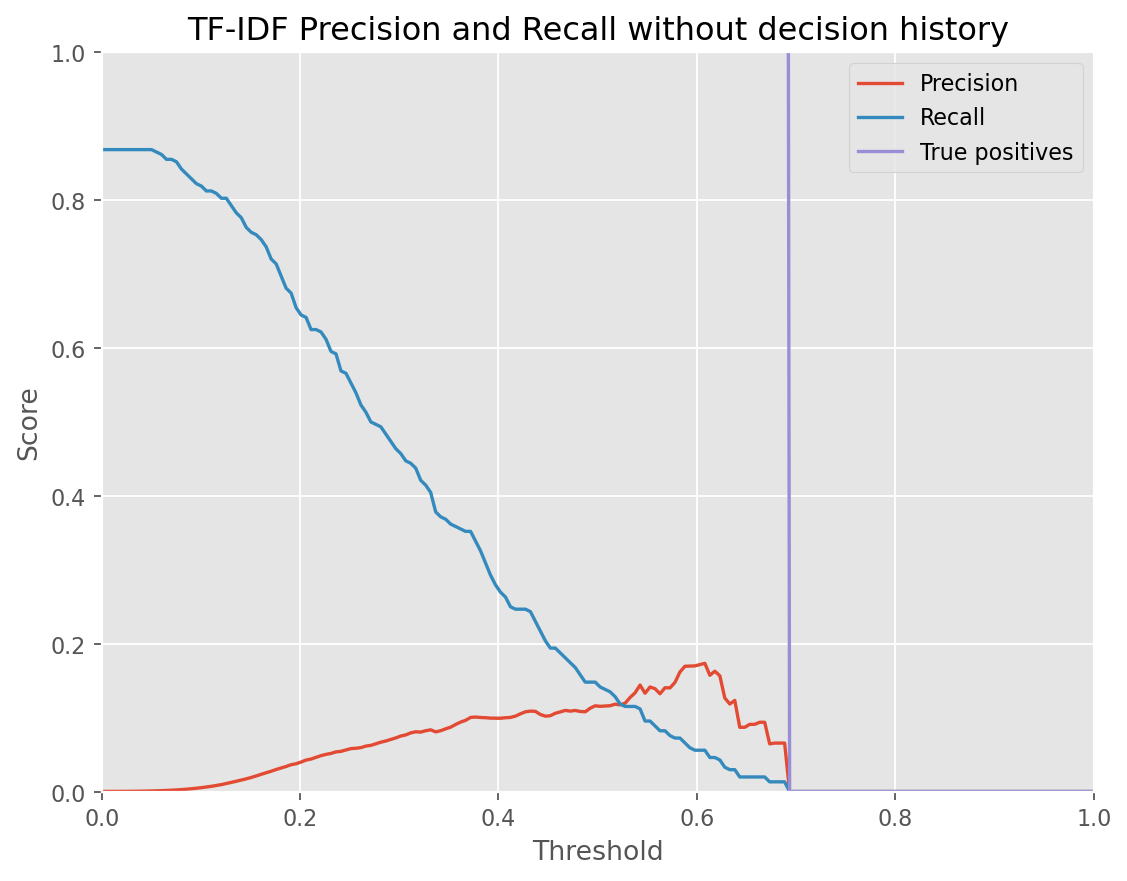

In [37]:

from matplotlib.pyplot import figure

#plt.style.use('seaborn-whitegrid')
plt.style.use('ggplot')
#plt.style.use('science')

figure(figsize=(8, 6), dpi=160)

x = np.linspace(0, 1, steps)
tps = [np.sum(x[0]) for x in other_scores]

plt.plot(x, precision_scores, label = "Precision")
plt.plot(x, recall_scores, label = "Recall")
plt.plot(x, tps, label = "True positives")

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("TF-IDF Precision and Recall without decision history")

plt.legend()

#plt.savefig("Evaluation/TF-IDF-minusbesluithistorie.png")

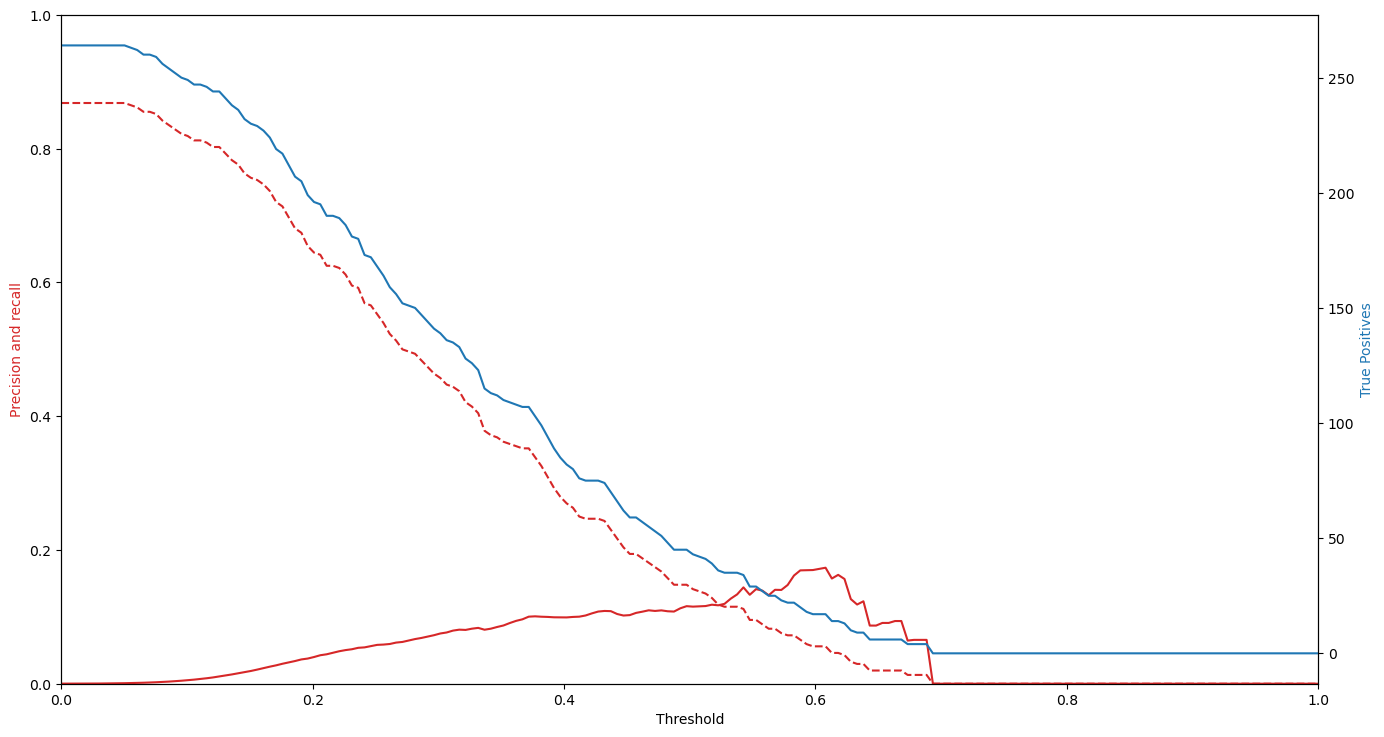

In [44]:
plt.style.use('default')
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Precision and recall', color=color)

ax1.plot(x, precision_scores, color=color)
ax1.plot(x, recall_scores, "--",color=color)

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('True Positives', color=color)  # we already handled the x-label with ax1
ax2.plot(x, tps, color=color)
#ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(16, 8)
plt.show()

# save the scores
with open("Evaluation/tf-idfPrecision-minusdecisionhistory.txt", "wb") as fp:
    pickle.dump(precision_scores, fp)
with open("Evaluation/tf-idfRecall-minusdecisionhistory.txt", "wb") as fp:
    pickle.dump(recall_scores, fp)

In [20]:
[np.sum(x[0]) for x in other_scores]

[264,
 264,
 264,
 264,
 264,
 264,
 264,
 264,
 264,
 264,
 264,
 263,
 262,
 260,
 260,
 259,
 256,
 254,
 252,
 250,
 249,
 247,
 247,
 246,
 244,
 244,
 241,
 238,
 236,
 232,
 230,
 229,
 227,
 224,
 219,
 217,
 212,
 207,
 205,
 199,
 196,
 195,
 190,
 190,
 189,
 186,
 181,
 180,
 173,
 172,
 168,
 164,
 159,
 156,
 152,
 151,
 150,
 147,
 144,
 141,
 139,
 136,
 135,
 133,
 128,
 126,
 123,
 115,
 113,
 112,
 110,
 109,
 108,
 107,
 107,
 103,
 99,
 94,
 89,
 85,
 82,
 80,
 76,
 75,
 75,
 75,
 74,
 70,
 66,
 62,
 59,
 59,
 57,
 55,
 53,
 51,
 48,
 45,
 45,
 45,
 43,
 42,
 41,
 39,
 36,
 35,
 35,
 35,
 34,
 29,
 29,
 27,
 25,
 25,
 23,
 22,
 22,
 20,
 18,
 17,
 17,
 17,
 14,
 14,
 13,
 10,
 9,
 9,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0